# Urban Simulation Assessment

## Data Preparation

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [7]:
# Import the data
G = nx.read_graphml('london.graph')

In [8]:
type(G)

networkx.classes.graph.Graph

In [9]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_85/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [10]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Cambridge Heath', {'coords': '(534826.876705217, 183290.99677941797)'})

In [11]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    
# To check node attributes:
list(G.nodes(data = True))[0]  

('Cambridge Heath', {'coords': (534826.876705217, 183290.99677941797)})

In [12]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Cambridge Heath',
 'Bethnal Green',
 {'length': 831.871588246875,
  'line_name': 'London Overground',
  'flows': 13757})

In [13]:
# add station_name attribute to node
node_name = {}
for i in list(G.nodes(data = True)):
    node_name[i[0]] = i[0]
nx.set_node_attributes(G,node_name,'station_name')

In [14]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Cambridge Heath',
 {'coords': (534826.876705217, 183290.99677941797),
  'station_name': 'Cambridge Heath'})

In [15]:
# add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [16]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Cambridge Heath',
 'Bethnal Green',
 {'length': 831.871588246875,
  'line_name': 'London Overground',
  'flows': 13757,
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

In [17]:
# Inverse weights:
flows_inv={}

for e1, e2, flow in G.edges(data='flows'):
    if flow != 0:
        flows_inv.update({(e1, e2): round(1./flow,7)})
    else:
        flows_inv.update({(e1, e2): 0})

nx.set_edge_attributes(G,flows_inv,'flows_inv')

list(G.edges(data=True))[0:5]

[('Cambridge Heath',
  'Bethnal Green',
  {'length': 831.871588246875,
   'line_name': 'London Overground',
   'flows': 13757,
   'station_1_': 'Cambridge Heath',
   'station_2_': 'Bethnal Green',
   'flows_inv': 7.27e-05}),
 ('Cambridge Heath',
  'London Fields',
  {'length': 979.4169859715302,
   'line_name': 'London Overground',
   'flows': 14207,
   'station_1_': 'Cambridge Heath',
   'station_2_': 'London Fields',
   'flows_inv': 7.04e-05}),
 ('Bethnal Green',
  'Liverpool Street',
  {'length': 2407.221146454469,
   'line_name': 'Central',
   'flows': 31880,
   'station_1_': 'Bethnal Green',
   'station_2_': 'Liverpool Street',
   'flows_inv': 3.14e-05}),
 ('Bethnal Green',
  'Mile End',
  {'length': 1992.4218024895752,
   'line_name': 'Central',
   'flows': 13305,
   'station_1_': 'Bethnal Green',
   'station_2_': 'Mile End',
   'flows_inv': 7.52e-05}),
 ('London Fields',
  'Hackney Downs',
  {'length': 926.0127117881323,
   'line_name': 'London Overground',
   'flows': 14179,
  

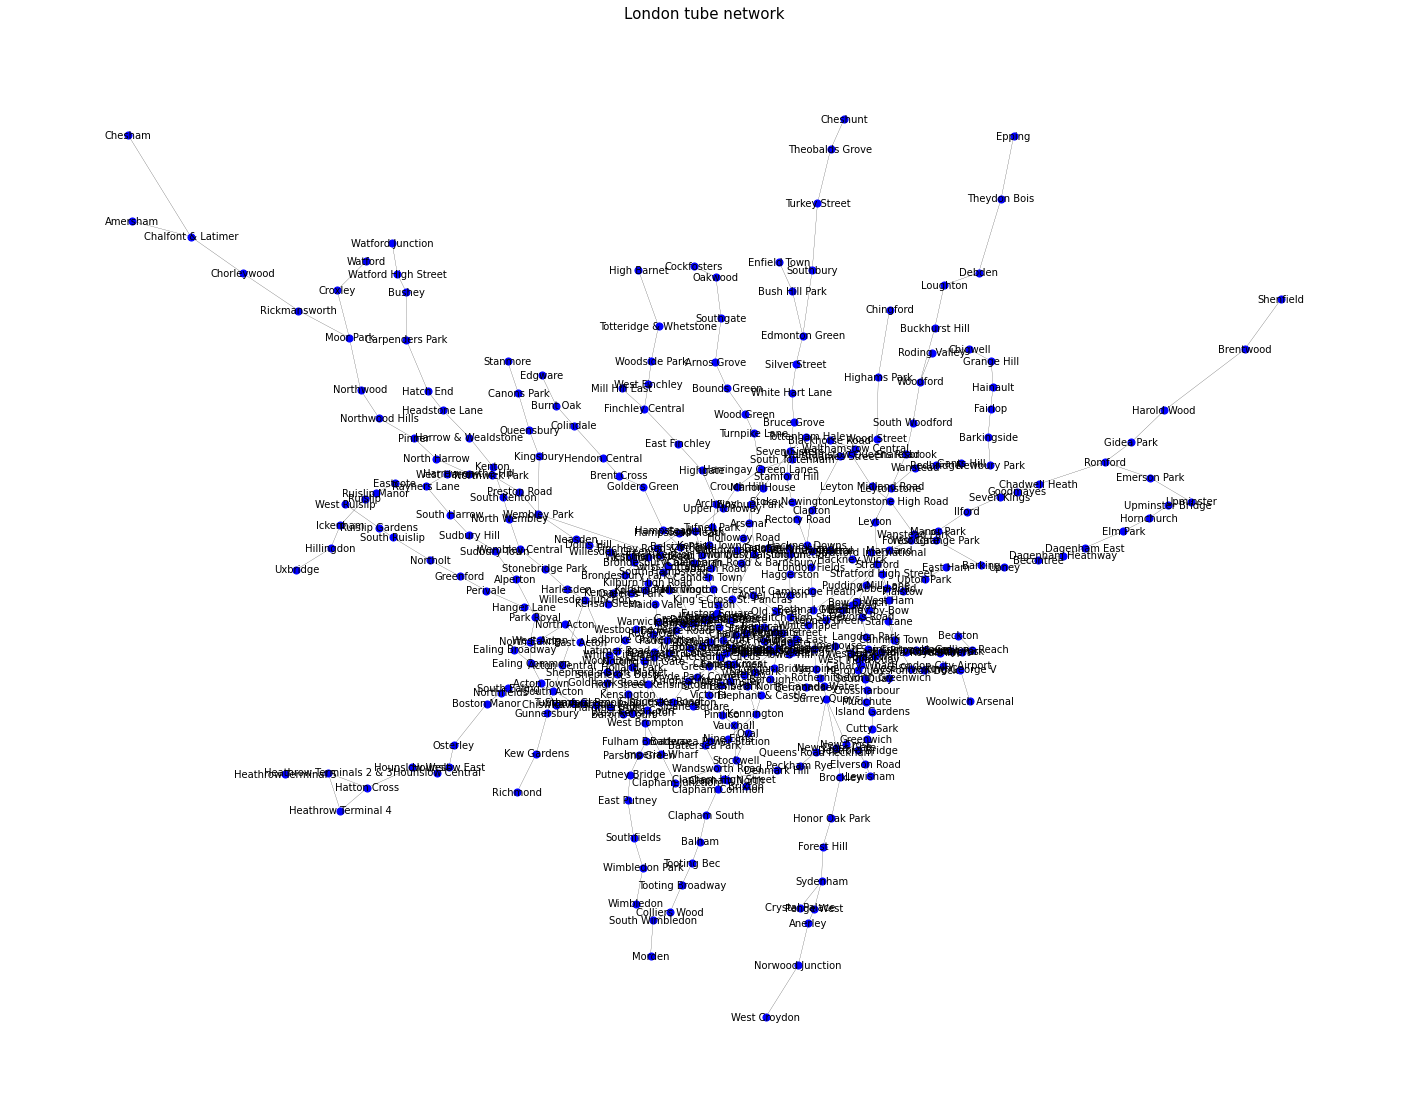

In [18]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()


In [19]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df.head()

,source,target,station_2_,length,line_name,flows_inv,flows,station_1_
0,Cambridge Heath,Bethnal Green,Bethnal Green,831.871588,London Overground,0.000073,13757,Cambridge Heath
1,Cambridge Heath,London Fields,London Fields,979.416986,London Overground,0.000070,14207,Cambridge Heath
2,Bethnal Green,Liverpool Street,Liverpool Street,2407.221146,Central,0.000031,31880,Bethnal Green
3,Bethnal Green,Mile End,Mile End,1992.421802,Central,0.000075,13305,Bethnal Green
4,London Fields,Hackney Downs,Hackney Downs,926.012712,London Overground,0.000071,14179,London Fields


## Part 1: London’s underground resilience

### I.1. Centrality Measures

#### 1. Degree Centrality

In [20]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [21]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Oxford Circus,Oxford Circus,0.0150
Earl's Court,Earl's Court,0.0150
West Ham,West Ham,0.0150
Canning Town,Canning Town,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150


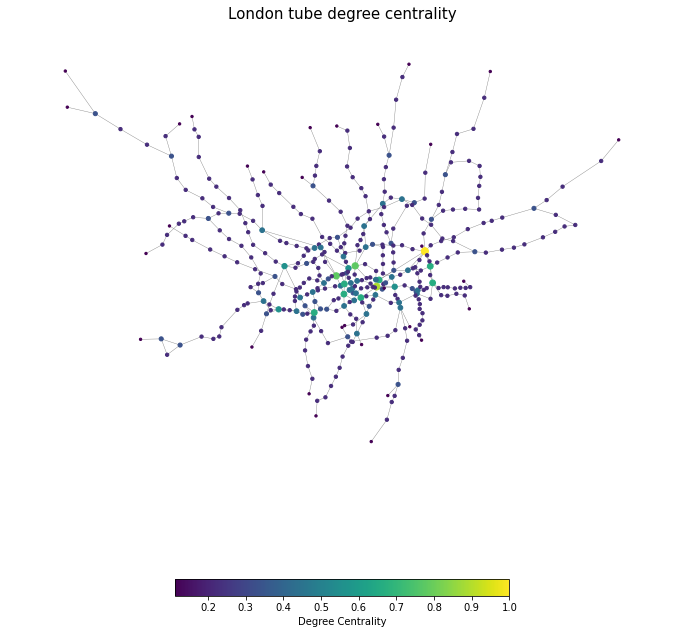

In [22]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### 2. Betweenness Centrality

In [23]:
### Weighted betweenness centrality:

#Let us compute the betweenness centrality for the network, considering the distance between stations:
# we're not inverting, because we use length, means the closer the more meaningful
bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')


In [24]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
Bank and Monument,Bank and Monument,17656.0
King's Cross St. Pancras,King's Cross St. Pancras,16693.0
Stratford,Stratford,14548.0
Oxford Circus,Oxford Circus,13561.0
Euston,Euston,13240.0
Baker Street,Baker Street,12150.0
Earl's Court,Earl's Court,11475.0
Shadwell,Shadwell,11128.0
Waterloo,Waterloo,10408.0
South Kensington,South Kensington,10335.0


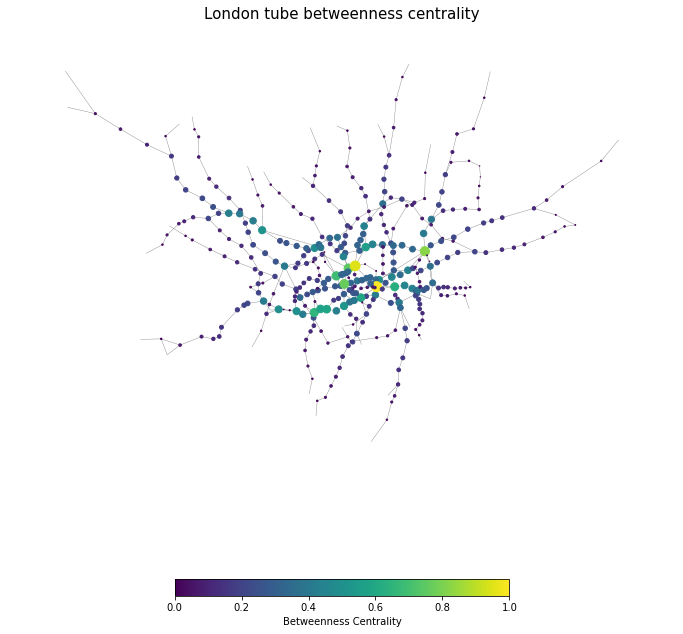

In [25]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

In [26]:
### Topological betweenness centrality: (not using the length), it's just the number of stops

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


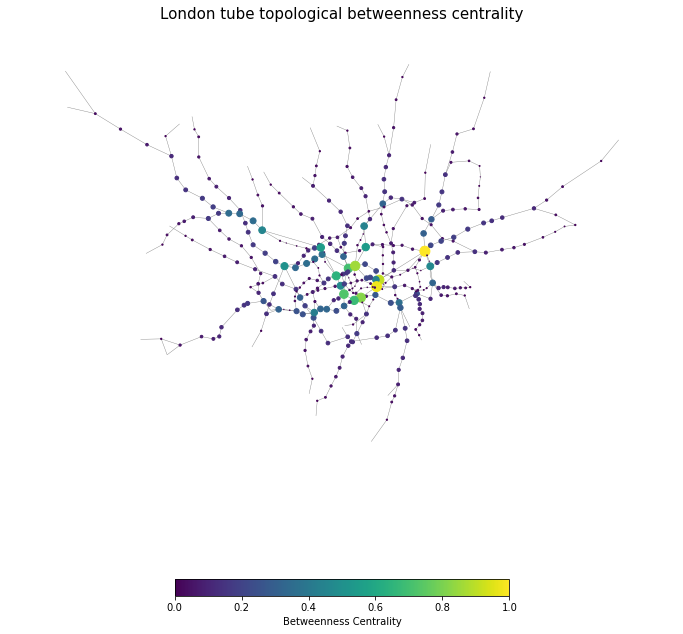

In [27]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### 3. Closeness Centrality

In [28]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
Holborn,Holborn,0.000079
King's Cross St. Pancras,King's Cross St. Pancras,0.000079
Tottenham Court Road,Tottenham Court Road,0.000079
Oxford Circus,Oxford Circus,0.000079
Leicester Square,Leicester Square,0.000078
Piccadilly Circus,Piccadilly Circus,0.000078
Charing Cross,Charing Cross,0.000078
Chancery Lane,Chancery Lane,0.000078
Covent Garden,Covent Garden,0.000078
Embankment,Embankment,0.000078


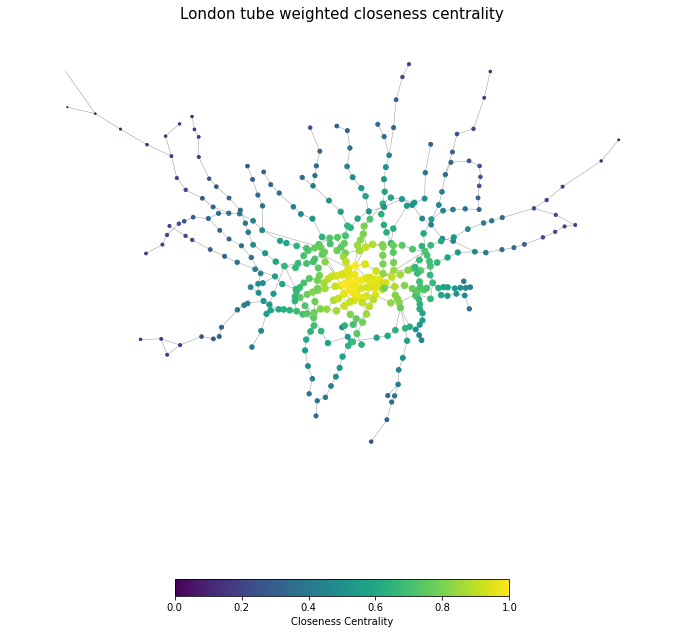

In [29]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

In [30]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


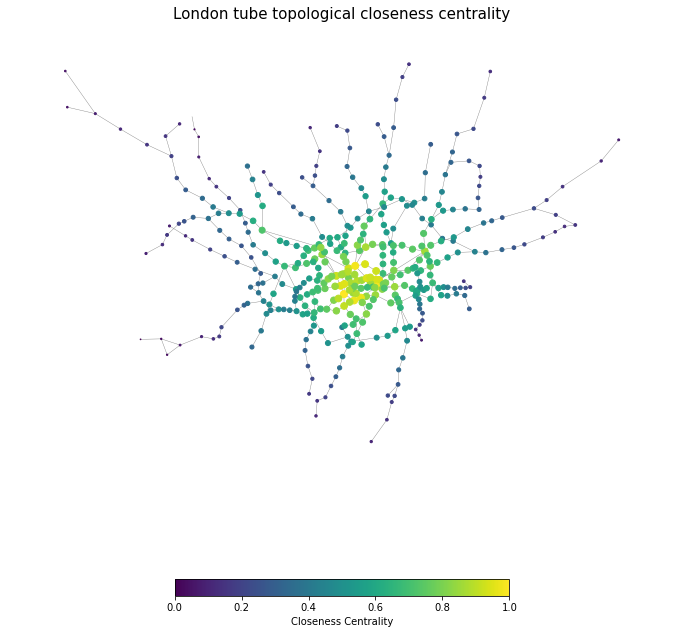

In [31]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

### I.2. Impact Measures

#### 1) Global Efficiency Of Graph

In [32]:
# Calculate the global efficiency of Graph
def my_global_efficiency(Graph):
    '''author Joel C Miller
       https://stackoverflow.com/a/57032282/2966723
    '''

    n = len(Graph)
    denom = n*(n-1)
    if denom>0:
        efficiency = 0
        for path_collection in nx.all_pairs_shortest_path_length(Graph):
            source = path_collection[0]
            for target in path_collection[1]:
                if target != source:
                    efficiency += 1./path_collection[1][target]    
        return efficiency/denom
    else:
        return 0

In [33]:
my_global_efficiency(G)

0.10125619359720937

#### 2) Largest connected component

In [34]:
def my_LCC(Graph):
    wholeSize = len(list(Graph.nodes))
    LCC_Size = Graph.subgraph(list(max(nx.connected_components(Graph), key=len))).number_of_nodes()
    
    return LCC_Size / wholeSize

In [35]:
my_LCC(G)

1.0

### I.3 Node removal

In [36]:
# pre-prep
initial_state = {
    'step': 0,
    'removed_station': 'none',
    'largest_connected_cluster': G.number_of_nodes()/G.number_of_nodes(),
    'efficiency':nx.global_efficiency(G)
}
initial_state_list = [initial_state]

In [37]:
# Degree Centrality
## approach a

In [38]:
# sort the order 
deg_london_sorted = sorted(deg_london.items(), key=lambda x:x[1], reverse=True)
# select top 11
deg_london_top_11 = [e for e,v in deg_london_sorted[:11]]

In [39]:
deg_london_top_11

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'Liverpool Street',
 'West Ham',
 'Canning Town',
 'Waterloo',
 'Green Park',
 'Oxford Circus',
 "Earl's Court"]

In [40]:
# remove items
deg_a_list = []
G_deg_a = G.copy()
i=0
for i in range(len(deg_london_top_11)):
    G_deg_a.remove_nodes_from([deg_london_top_11[i]])
    Subg_deg_a = [G_deg_a.subgraph(c).copy() for c in nx.connected_components(G_deg_a)]
    d = {'step': i+1,
         'removed_station':deg_london_top_11[i],
         'largest_connected_cluster': [len(subgraph.nodes) for subgraph in Subg_deg_a][0]/G_deg_a.number_of_nodes(),
         'efficiency':nx.global_efficiency(G_deg_a)
        }
    deg_a_list.append(d)
    G_deg_a = G_deg_a.copy()

In [41]:
# create the dataframe
deg_a_list = initial_state_list + deg_a_list
deg_a_df = pd.DataFrame(deg_a_list)

In [42]:
deg_a_df

,step,removed_station,largest_connected_cluster,efficiency
0,0,none,1.000000,0.101256
1,1,Stratford,0.947500,0.088917
2,2,Bank and Monument,0.947368,0.085862
3,3,Baker Street,0.947236,0.082033
4,4,King's Cross St. Pancras,0.942065,0.075700
5,5,Liverpool Street,0.929293,0.073903
6,6,West Ham,0.924051,0.071298
7,7,Canning Town,0.888325,0.067264
8,8,Waterloo,0.888041,0.065596
9,9,Green Park,0.887755,0.064602


In [43]:
## approach b

In [44]:
## approach b 
deg_b_list = []
G_deg_b = G.copy()
i = 0
while i < 5:
    deg_london_b =nx.degree_centrality(G_deg_b)
    nx.set_node_attributes(G_deg_b,dict(deg_london_b),'degree')
    degree_values=[(k[1]['degree']) for k in G_deg_b.nodes(data=True)]
    maxdeg=[n for n in G_deg_b.nodes() if G_deg_b.nodes[n]['degree'] == max(degree_values)]
    G_deg_b.remove_nodes_from(maxdeg)
    print(maxdeg)
    Subg_deg_b = [G_deg_b.subgraph(c).copy() for c in nx.connected_components(G_deg_b)]
    d = {'step': i+1,
         'removed_station':maxdeg,
         'largest_connected_cluster': [len(subgraph.nodes) for subgraph in Subg_deg_b][0]/G_deg_b.number_of_nodes(),
         'efficiency':nx.global_efficiency(G_deg_b)
        }
    deg_b_list.append(d)
    G_deg_b = G_deg_b.copy()
    i += 1

['Stratford']
['Bank and Monument']
['Baker Street', "King's Cross St. Pancras"]
['Canning Town', 'Green Park', 'Oxford Circus', "Earl's Court"]
['Willesden Junction', 'Waterloo', 'Turnham Green']


In [45]:
# create the dataframe
deg_b_list = initial_state_list + deg_b_list
deg_b_df = pd.DataFrame(deg_b_list).explode('removed_station')
deg_b_df['step'] = deg_b_df.reset_index().index
deg_b_df 

,step,removed_station,largest_connected_cluster,efficiency
0,0,none,1.000000,0.101256
1,1,Stratford,0.947500,0.088917
2,2,Bank and Monument,0.947368,0.085862
3,3,Baker Street,0.942065,0.075700
3,4,King's Cross St. Pancras,0.942065,0.075700
4,5,Canning Town,0.905852,0.066687
4,6,Green Park,0.905852,0.066687
4,7,Oxford Circus,0.905852,0.066687
4,8,Earl's Court,0.905852,0.066687
5,9,Willesden Junction,0.858974,0.054729


In [46]:
# betweenness centrality 
## approach a

In [47]:
# sort the order 
bet_london_sorted = sorted(bet_london_t.items(), key=lambda x:x[1], reverse=True)
# select top 11
bet_london_top_10 = [e for e,v in bet_london_sorted[:10]]

In [48]:
bet_london_top_10

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [49]:
# remove items
bet_a_list = []
G_bet_a = G.copy()
i=0
for i in range(len(bet_london_top_10)):
    G_bet_a.remove_nodes_from([bet_london_top_10[i]])
    Subg_bet_a = [G_bet_a.subgraph(c).copy() for c in nx.connected_components(G_bet_a)]
    d = {'step': i+1,
         'removed_station':bet_london_top_10[i],
         'largest_connected_cluster': [len(subgraph.nodes) for subgraph in Subg_bet_a][0]/G_bet_a.number_of_nodes(),
         'efficiency':nx.global_efficiency(G_bet_a)
        }
    bet_a_list.append(d)
    G_bet_a = G_bet_a.copy()

In [50]:
# create the dataframe
bet_a_list = initial_state_list + bet_a_list
bet_a_df = pd.DataFrame(bet_a_list)
bet_a_df

,step,removed_station,largest_connected_cluster,efficiency
0,0,none,1.000000,0.101256
1,1,Stratford,0.947500,0.088917
2,2,Bank and Monument,0.947368,0.085862
3,3,Liverpool Street,0.947236,0.084963
4,4,King's Cross St. Pancras,0.934509,0.078498
5,5,Waterloo,0.934343,0.075942
6,6,Green Park,0.934177,0.074152
7,7,Euston,0.878173,0.068206
8,8,Westminster,0.877863,0.067660
9,9,Baker Street,0.872449,0.064700


In [51]:
## approach b 
bet_b_list = []
G_bet_b = G.copy()
i = 0
while i < 10:
    bet_london_t=nx.betweenness_centrality(G_bet_b, normalized=False)
    nx.set_node_attributes(G_bet_b,bet_london_t,'betweenness_t')
    betweenness_t_values=[(k[1]['betweenness_t']) for k in G_bet_b.nodes(data=True)]
    maxbet=[n for n in G_bet_b.nodes() if G_bet_b.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
    G_bet_b.remove_nodes_from(maxbet)
    print(maxbet)
    Subg_bet_b = [G_bet_b.subgraph(c).copy() for c in nx.connected_components(G_bet_b)]
    d = {'step': i+1,
         'removed_station':maxbet[0],
         'largest_connected_cluster': [len(subgraph.nodes) for subgraph in Subg_bet_b][0]/G_bet_b.number_of_nodes(),
         'efficiency':nx.global_efficiency(G_bet_b)
        }
    bet_b_list.append(d)
    G_bet_b = G_bet_b.copy()
    i += 1

['Stratford']
["King's Cross St. Pancras"]
['Waterloo']
['Bank and Monument']
['Canada Water']
['West Hampstead']
["Earl's Court"]
["Shepherd's Bush"]
['Euston']
['Baker Street']


In [52]:
# create the dataframe
bet_b_list = initial_state_list + bet_b_list
bet_b_df = pd.DataFrame(bet_b_list)
bet_b_df

,step,removed_station,largest_connected_cluster,efficiency
0,0,none,1.000000,0.101256
1,1,Stratford,0.947500,0.088917
2,2,King's Cross St. Pancras,0.947368,0.084603
3,3,Waterloo,0.947236,0.081829
4,4,Bank and Monument,0.947103,0.077678
5,5,Canada Water,0.946970,0.072832
6,6,West Hampstead,0.372152,0.053210
7,7,Earl's Court,0.373096,0.051656
8,8,Shepherd's Bush,0.374046,0.045844
9,9,Euston,0.375000,0.041631


In [53]:
# closeness centrality 
## approach a

In [55]:
# sort the order 
clos_london_sorted = sorted(clos_t.items(), key=lambda x:x[1], reverse=True)
# select top 11
clos_london_top_10 = [e for e,v in clos_london_sorted[:10]]

In [56]:
clos_london_top_10

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Angel',
 'Farringdon',
 'Moorgate']

In [57]:
# remove items
clos_a_list = []
G_clos_a = G.copy()
i=0
for i in range(len(clos_london_top_10)):
    G_clos_a.remove_nodes_from([clos_london_top_10[i]])
    Subg_clos_a = [G_clos_a.subgraph(c).copy() for c in nx.connected_components(G_clos_a)]
    d = {'step': i+1,
         'removed_station':clos_london_top_10[i],
         'largest_connected_cluster': [len(subgraph.nodes) for subgraph in Subg_clos_a][0]/G_clos_a.number_of_nodes(),
         'efficiency':nx.global_efficiency(G_clos_a)
        }
    clos_a_list.append(d)
    G_clos_a = G_clos_a.copy()

In [58]:
# create the dataframe
clos_a_list = initial_state_list + clos_a_list
clos_a_df = pd.DataFrame(clos_a_list)
clos_a_df

,step,removed_station,largest_connected_cluster,efficiency
0,0,none,1.000000,0.101256
1,1,Green Park,1.000000,0.099190
2,2,Bank and Monument,1.000000,0.094872
3,3,King's Cross St. Pancras,1.000000,0.087934
4,4,Westminster,1.000000,0.087372
5,5,Waterloo,1.000000,0.084859
6,6,Oxford Circus,1.000000,0.082781
7,7,Bond Street,1.000000,0.082581
8,8,Angel,1.000000,0.082600
9,9,Farringdon,1.000000,0.082622


In [59]:
## approach b 
clos_b_list = []
G_clos_b = G.copy()
i = 0
while i < 10:
    clos_t=nx.closeness_centrality(G_clos_b)
    nx.set_node_attributes(G_clos_b,clos_t,'closeness_t')
    closeness_t_values=[(k[1]['closeness_t']) for k in G_clos_b.nodes(data=True)]
    maxclos=[n for n in G_clos_b.nodes() if G_clos_b.nodes[n]['closeness_t'] == max(closeness_t_values)]
    G_clos_b.remove_nodes_from(maxclos)
    Subg_clos_b = [G_clos_b.subgraph(c).copy() for c in nx.connected_components(G_clos_b)]
    d = {'step': i+1,
         'removed_station':maxclos[0],
         'largest_connected_cluster': [len(subgraph.nodes) for subgraph in Subg_clos_b][0]/G_clos_b.number_of_nodes(),
         'efficiency':nx.global_efficiency(G_clos_b)
        }
    clos_b_list.append(d)
    G_clos_b = G_clos_b.copy()
    i += 1

In [60]:
# create the dataframe
clos_b_list = initial_state_list + clos_b_list
clos_b_df = pd.DataFrame(clos_b_list)
clos_b_df

,step,removed_station,largest_connected_cluster,efficiency
0,0,none,1.000000,0.101256
1,1,Green Park,1.000000,0.099190
2,2,King's Cross St. Pancras,1.000000,0.094435
3,3,Waterloo,1.000000,0.091816
4,4,Bank and Monument,1.000000,0.085426
5,5,West Hampstead,1.000000,0.080544
6,6,Canada Water,0.427848,0.058101
7,7,Stratford,0.373096,0.051884
8,8,Earl's Court,0.374046,0.050350
9,9,Shepherd's Bush,0.375000,0.044395


In [61]:
# plot
deg_a_df["Removal Strategy"] = "non-sequential"
deg_b_df["Removal Strategy"] = "sequential"
deg_df = pd.concat([deg_a_df, deg_b_df])
deg_df

,step,removed_station,largest_connected_cluster,efficiency,Removal Strategy
0,0,none,1.000000,0.101256,non-sequential
1,1,Stratford,0.947500,0.088917,non-sequential
2,2,Bank and Monument,0.947368,0.085862,non-sequential
3,3,Baker Street,0.947236,0.082033,non-sequential
4,4,King's Cross St. Pancras,0.942065,0.075700,non-sequential
5,5,Liverpool Street,0.929293,0.073903,non-sequential
6,6,West Ham,0.924051,0.071298,non-sequential
7,7,Canning Town,0.888325,0.067264,non-sequential
8,8,Waterloo,0.888041,0.065596,non-sequential
9,9,Green Park,0.887755,0.064602,non-sequential


In [62]:
# plot
bet_a_df["Removal Strategy"] = "non-sequential"
bet_b_df["Removal Strategy"] = "sequential"
bet_df = pd.concat([bet_a_df, bet_b_df])
bet_df

,step,removed_station,largest_connected_cluster,efficiency,Removal Strategy
0,0,none,1.000000,0.101256,non-sequential
1,1,Stratford,0.947500,0.088917,non-sequential
2,2,Bank and Monument,0.947368,0.085862,non-sequential
3,3,Liverpool Street,0.947236,0.084963,non-sequential
4,4,King's Cross St. Pancras,0.934509,0.078498,non-sequential
5,5,Waterloo,0.934343,0.075942,non-sequential
6,6,Green Park,0.934177,0.074152,non-sequential
7,7,Euston,0.878173,0.068206,non-sequential
8,8,Westminster,0.877863,0.067660,non-sequential
9,9,Baker Street,0.872449,0.064700,non-sequential


In [63]:
# plot
clos_a_df["Removal Strategy"] = "non-sequential"
clos_b_df["Removal Strategy"] = "sequential"
clos_df = pd.concat([clos_a_df, clos_b_df])
clos_df

,step,removed_station,largest_connected_cluster,efficiency,Removal Strategy
0,0,none,1.000000,0.101256,non-sequential
1,1,Green Park,1.000000,0.099190,non-sequential
2,2,Bank and Monument,1.000000,0.094872,non-sequential
3,3,King's Cross St. Pancras,1.000000,0.087934,non-sequential
4,4,Westminster,1.000000,0.087372,non-sequential
5,5,Waterloo,1.000000,0.084859,non-sequential
6,6,Oxford Circus,1.000000,0.082781,non-sequential
7,7,Bond Street,1.000000,0.082581,non-sequential
8,8,Angel,1.000000,0.082600,non-sequential
9,9,Farringdon,1.000000,0.082622,non-sequential


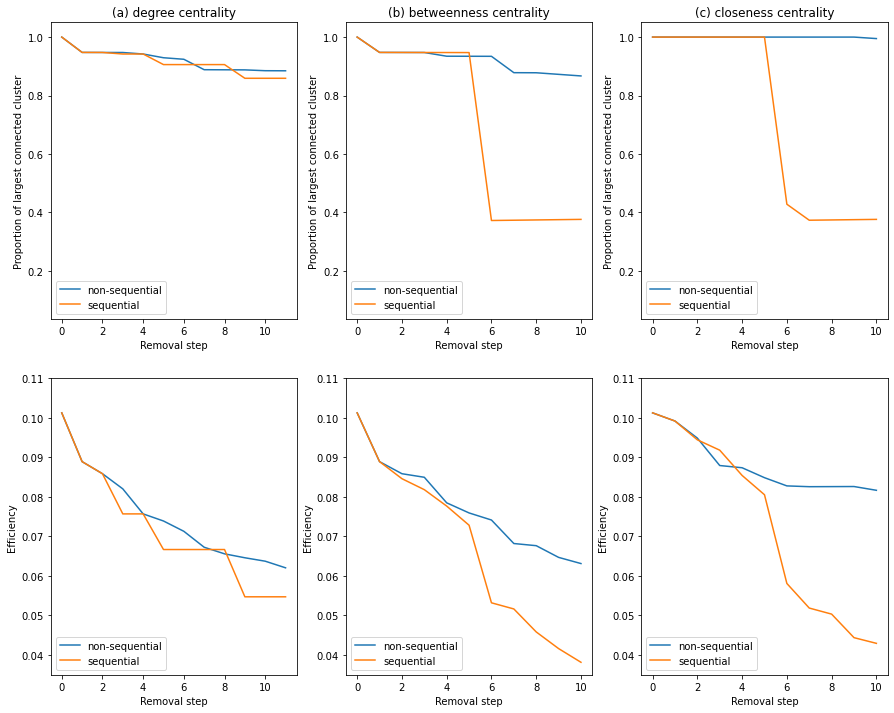

In [65]:
# plot 
fig, axes = plt.subplots(2,3, figsize=(15,12))
for label, df in deg_df.groupby('Removal Strategy'):
    df.plot(ax=axes[0,0], kind = 'line', x="step", y = 'largest_connected_cluster', label = label)
for label, df in deg_df.groupby('Removal Strategy'):
    df.plot(ax=axes[1,0], kind = 'line', x="step", y = 'efficiency', label = label)
for label, df in bet_df.groupby('Removal Strategy'):
    df.plot(ax=axes[0,1], kind = 'line', x="step", y = 'largest_connected_cluster', label = label)
for label, df in bet_df.groupby('Removal Strategy'):
    df.plot(ax=axes[1,1], kind = 'line', x="step", y = 'efficiency', label = label)
for label, df in clos_df.groupby('Removal Strategy'):
    df.plot(ax=axes[0,2], kind = 'line', x="step", y = 'largest_connected_cluster', label = label)
for label, df in clos_df.groupby('Removal Strategy'):
    df.plot(ax=axes[1,2], kind = 'line', x="step", y = 'efficiency', label = label)
axes[0,0].set(ylabel="Proportion of largest connected cluster",xlabel="Removal step")
axes[1,0].set(ylabel="Efficiency",xlabel="Removal step")
axes[0,1].set(ylabel="Proportion of largest connected cluster",xlabel="Removal step")
axes[1,1].set(ylabel="Efficiency",xlabel="Removal step")
axes[0,2].set(ylabel="Proportion of largest connected cluster",xlabel="Removal step")
axes[1,2].set(ylabel="Efficiency",xlabel="Removal step")
axes[0,0].title.set_text('(a) degree centrality')
axes[0,1].title.set_text('(b) betweenness centrality')
axes[0,2].title.set_text('(c) closeness centrality')
axes[0,0].set_ylim([0.035, 1.05])
axes[0,1].set_ylim([0.035, 1.05])
axes[0,2].set_ylim([0.035, 1.05])
axes[1,0].set_ylim([0.035, 0.11])
axes[1,1].set_ylim([0.035, 0.11])
axes[1,2].set_ylim([0.035, 0.11])
axes[0,0].legend(loc="lower left")
axes[0,1].legend(loc="lower left")
axes[0,2].legend(loc="lower left")
axes[1,0].legend(loc="lower left")
axes[1,1].legend(loc="lower left")
axes[1,2].legend(loc="lower left")
plt.savefig("noderemoval.png")

### II.Flows: weighted network

#### II.1 Weighted betweeness centrality

In [66]:
# check edge
list(G.edges(data = True))[0]

('Cambridge Heath',
 'Bethnal Green',
 {'length': 831.871588246875,
  'line_name': 'London Overground',
  'flows': 13757,
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green',
  'flows_inv': 7.27e-05})

In [70]:
# To dataframe using the nodes as the index
def my_weighted_Betweeness(Graph):
    bet_london_w=nx.betweenness_centrality(Graph,weight='flows_inv',normalized=False)
    nx.set_node_attributes(Graph,bet_london_w,'betweenness_wf')
    df = pd.DataFrame(index=Graph.nodes())
    df['station_name'] = pd.Series(nx.get_node_attributes(Graph, 'station_name'))
    df['betweenness_wf'] = pd.Series(nx.get_node_attributes(Graph, 'betweenness_wf'))
    df_sorted = df.sort_values(["betweenness_wf"], ascending=False)
    return df_sorted

In [71]:
top_Bet_w = my_weighted_Betweeness(G)[0:10]
top_Bet_w

,station_name,betweenness_wf
Green Park,Green Park,45198.50
Bank and Monument,Bank and Monument,39795.00
Waterloo,Waterloo,32310.75
Westminster,Westminster,30085.25
Liverpool Street,Liverpool Street,26530.00
Stratford,Stratford,26125.00
Euston,Euston,22272.50
Oxford Circus,Oxford Circus,20005.00
Bond Street,Bond Street,19943.75
Baker Street,Baker Street,19240.50


In [72]:
list(G.nodes(data = True))[0]

('Cambridge Heath',
 {'coords': (534826.876705217, 183290.99677941797),
  'station_name': 'Cambridge Heath',
  'degree': 0.005,
  'betweenness_w': 1484.0,
  'betweenness_t': 2361.3970779220754,
  'closeness_w': 6.725325988470908e-05,
  'closeness_t': 0.0930448941614329,
  'betweenness_wf': 1484.0})

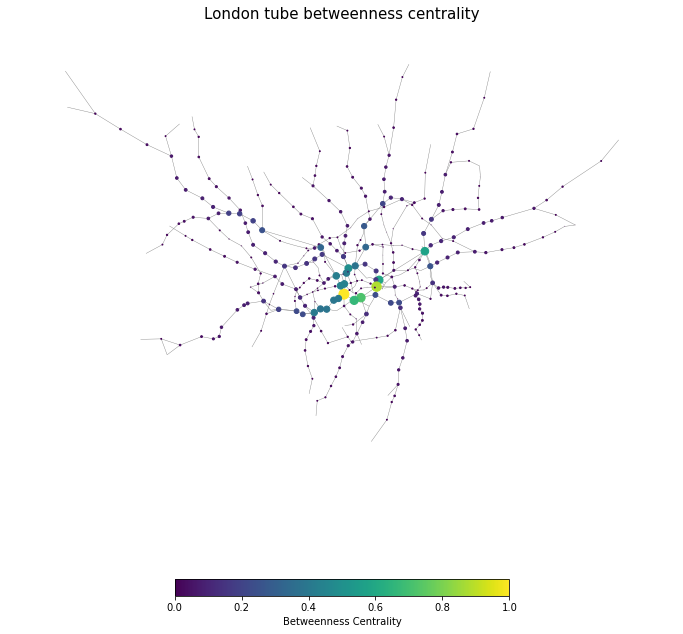

In [73]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_wf']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_wf']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_wf']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

#### II.2 Weighted impact measures

#### II.3 Node Removal

In [172]:
# pre-prep
initial_state_2 = {
    'step': 0,
    'removed_station': 'none',
    'total_flows': G.size(weight="flows"),
    'efficiency':nx.local_efficiency(G)
}
initial_state_list_2 = [initial_state_2]   

In [173]:
# topological - strategy a
# select top 3
bet_london_t_top_3 = [e for e,v in bet_london_sorted[:3]]
bet_london_t_top_3

['Stratford', 'Bank and Monument', 'Liverpool Street']

In [174]:
# create list
bet_t_a_list = []
G_bet_t_a = G.copy()
i=0
for i in range(len(bet_london_t_top_3)):
    G_bet_t_a.remove_nodes_from([bet_london_t_top_3[i]])
    Subg_bet_t_a = [G_bet_a.subgraph(c).copy() for c in nx.connected_components(G_bet_t_a)]
    d = {'step': i+1,
         'removed_station':bet_london_t_top_3[i],
         'total_flows': G_bet_t_a.size(weight='flows')/G.size(weight='flows'),
         'efficiency':nx.global_efficiency(G_bet_t_a)
        }
    bet_t_a_list.append(d)
    G_bet_t_a = G_bet_t_a.copy()

In [175]:
# create the dataframe
bet_t_a_list = initial_state_list_2 + bet_t_a_list
bet_t_a_df = pd.DataFrame(bet_t_a_list)
bet_t_a_df

,step,removed_station,total_flows,efficiency
0,0,none,9.930847e+06,0.030549
1,1,Stratford,9.633188e-01,0.088917
2,2,Bank and Monument,9.015317e-01,0.085862
3,3,Liverpool Street,8.921061e-01,0.084963


In [176]:
# topological - strategy b
bet_t_b_list = []
G_bet_t_b = G.copy()
i = 0
while i < 3:
    bet_london_t=nx.betweenness_centrality(G_bet_t_b, normalized=False)
    nx.set_node_attributes(G_bet_t_b,bet_london_t,'betweenness_t')
    betweenness_t_values=[(k[1]['betweenness_t']) for k in G_bet_t_b.nodes(data=True)]
    maxbet=[n for n in G_bet_t_b.nodes() if G_bet_t_b.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
    G_bet_t_b.remove_nodes_from(maxbet)
    print(maxbet)
    Subg_bet_t_b = [G_bet_t_b.subgraph(c).copy() for c in nx.connected_components(G_bet_t_b)]
    d = {'step': i+1,
         'removed_station':maxbet[0],
         'total_flows': 1-(G_bet_t_b.size(weight='flows')/G.size(weight="flows")),
         'efficiency':nx.global_efficiency(G_bet_t_b)
        }
    bet_t_b_list.append(d)
    G_bet_t_b = G_bet_t_b.copy()
    i += 1

['Stratford']
["King's Cross St. Pancras"]
['Waterloo']


In [177]:
# create the dataframe
bet_t_b_list = initial_state_list_2 + bet_t_b_list
bet_t_b_df = pd.DataFrame(bet_t_b_list)
bet_t_b_df

,step,removed_station,total_flows,efficiency
0,0,none,9.930847e+06,0.030549
1,1,Stratford,3.668116e-02,0.088917
2,2,King's Cross St. Pancras,8.266707e-02,0.084603
3,3,Waterloo,1.412957e-01,0.081829


In [178]:
# weighted - strategy a
# sort the order 
bet_london_w_sorted = sorted(bet_london_w.items(), key=lambda x:x[1], reverse=True)
# select top 10
bet_london_w_top_3 = [e for e,v in bet_london_w_sorted[:3]]

In [179]:
bet_london_w_top_3

['Waterloo', 'Bank and Monument', 'Green Park']

In [180]:
# create list
bet_w_a_list = []
G_bet_w_a = G.copy()
i=0
for i in range(len(bet_london_w_top_3)):
    G_bet_w_a.remove_nodes_from([bet_london_w_top_3[i]])
    Subg_bet_w_a = [G_bet_w_a.subgraph(c).copy() for c in nx.connected_components(G_bet_w_a)]
    d = {'step': i+1,
         'removed_station':bet_london_w_top_3[i],
         'total_flows': G_bet_w_a.size(weight='flows')/G.size(weight="flows"),
         'efficiency':nx.global_efficiency(G_bet_w_a)
        }
    bet_w_a_list.append(d)
    G_bet_w_a = G_bet_w_a.copy()

In [181]:
# create the dataframe
bet_w_a_list = initial_state_list_2 + bet_w_a_list
bet_w_a_df = pd.DataFrame(bet_w_a_list)
bet_w_a_df

,step,removed_station,total_flows,efficiency
0,0,none,9.930847e+06,0.030549
1,1,Waterloo,9.413714e-01,0.098390
2,2,Bank and Monument,9.010587e-01,0.095111
3,3,Green Park,8.309839e-01,0.093323


In [184]:
# weighted - strategy b
bet_w_b_list = []
G_bet_w_b = G.copy()
i = 0
while i < 3:
    bet_london_w=nx.betweenness_centrality(G_bet_w_b, weight='flows_inv', normalized=False)
    nx.set_node_attributes(G_bet_w_b,bet_london_w,'betweenness_w')
    betweenness_w_values=[(k[1]['betweenness_w']) for k in G_bet_w_b.nodes(data=True)]
    maxbet=[n for n in G_bet_w_b.nodes() if G_bet_w_b.nodes[n]['betweenness_w'] == max(betweenness_w_values)]
    G_bet_w_b.remove_nodes_from(maxbet)
    print(maxbet)
    Subg_bet_w_b = [G_bet_w_b.subgraph(c).copy() for c in nx.connected_components(G_bet_w_b)]
    d = {'step': i+1,
         'removed_station':maxbet[0],
         'total_flows': G_bet_w_b.size(weight='flows'),
         'efficiency':nx.global_efficiency(G_bet_w_b)
        }
    bet_w_b_list.append(d)
    G_bet_w_b = G_bet_w_b.copy()
    i += 1

['Green Park']
['Bank and Monument']
["King's Cross St. Pancras"]


In [185]:
# create the dataframe
bet_w_b_list = initial_state_list_2 + bet_w_b_list
bet_w_b_df = pd.DataFrame(bet_w_b_list)
bet_w_b_df

,step,removed_station,total_flows,efficiency
0,0,none,9930847.0,0.030549
1,1,Green Park,9234945.0,0.099190
2,2,Bank and Monument,8621346.0,0.094872
3,3,King's Cross St. Pancras,8164667.0,0.087934


## Part 2: Spatial Interaction models

In [90]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt

In [91]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

In [92]:
def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [93]:
#read in your London Commuting Data
cdata = pd.read_csv("https://raw.githubusercontent.com/hansenwgn/urbsim/main/london_flows.csv")

In [94]:
#Take a look
cdata.head(5)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [95]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [96]:
#remove intraflows
cdata = cdata[cdata["station_origin"] != cdata["station_destination"]]


#remove Battersea Park
cdata = cdata[cdata['station_origin'] != 'Battersea Park']

cdata = cdata[cdata['station_destination'] != 'Battersea Park']
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61413 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61413 non-null  object 
 1   station_destination  61413 non-null  object 
 2   flows                61413 non-null  int64  
 3   population           61413 non-null  int64  
 4   jobs                 61413 non-null  int64  
 5   distance             61413 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [97]:
cdata.columns

Index(['station_origin', 'station_destination', 'flows', 'population', 'jobs',
       'distance'],
      dtype='object')

In [98]:
cdata.rename(columns={"flows":"Total","station_origin":"OrigCodeNew", "station_destination": "DestCodeNew", "population":"Oi1_origpop", 'jobs':'Dj2_destsal', 
                      'distance':'Dist'}, inplace = True)

In [99]:
cdata.head()

,OrigCodeNew,DestCodeNew,Total,Oi1_origpop,Dj2_destsal,Dist
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [100]:
cdatamat = cdata.pivot_table(values ="Total", index="OrigCodeNew", columns = "DestCodeNew",
                                    aggfunc=np.sum, margins=True).fillna(0)
cdatamat

DestCodeNew,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
OrigCodeNew,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,599
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224
Acton Town,0.0,0.0,0.0,3.0,17.0,0.0,35.0,0.0,0.0,11.0,...,77.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,3745
Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2886
Aldgate East,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,24.0,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,5.0,47.0,0.0,0.0,0.0,0.0,22.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4868
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530
Woodside Park,0.0,0.0,1.0,26.0,11.0,0.0,0.0,0.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093


In [101]:
##set out all the fomrulas
#formula1 = "Total ~ np.log(Oi1_origpop) + np.log(Dj2_destsal) + np.log(Dist) -1"
#formula2 = "Total ~ OrigCodeNew + np.log(Dj2_destsal) + np.log(Dist) -1"
#formula3 = "Total ~ np.log(Oi1_origpop) + DestCodeNew + np.log(Dist) -1"
#formula4 = "Total ~ OrigCodeNew + DestCodeNew + np.log(Dist) -1"
#formula5 = "Total ~ np.log(Oi1_origpop) + np.log(Dj2_destsal) + Dist -1"
#formula6 = "Total ~ OrigCodeNew + np.log(Dj2_destsal) + Dist -1"
#formula7 = "Total ~ np.log(Oi1_origpop) + DestCodeNew + Dist -1"
#formula8 = "Total ~ OrigCodeNew + DestCodeNew + Dist -1"

##create a list of all the formulas
#formulas = [formula1, formula2, formula3, formula4, 
#             formula5, formula6, formula7, formula8]

##list the models name
#models = ["uncosim_pow", "prodsim_pow", "attrsim_pow", "doublesim_pow",
#          "uncosim_exp", "prodsim_exp", "attrsim_exp", "doublesim_exp"]

##create a set of tuples to store whether a paramater
##will be in the model or not
#model_params = [(True, True, True),
#                (False, True, True),
#                (True, False, True),
#                (False, False, True),
#                (True, True, True),
#                (False, True, True),
#                (True, False, True),
#                (False, False, True)]

##create an ampty dictionary to store the results
#results = {"Model":models,
#           "R2": [],
#           "RMSE": [],
#           "Alpha":[],
#           "Gamma":[],
#           "Beta":[]}

##loop over each formula
#for i, formula in enumerate(formulas):
    
#     #run the specified model
#     sim = smf.glm(formula = formula, 
#                  data = cdata,
#                  family = sm.families.Poisson()).fit()
#     #clauclate the estimates
#     cdata[models[i]] = sim.mu
    
#     #if the alpha paramater is true
#     if model_params[i][0] == True:
        
#         #if there are three params then it will be 
#         #in the third position
#         if sum(model_params[i]) == 3:
            
#             results["Alpha"].append(sim.params[-3])
            
#         #otherwise it will be in the second paramater
#         else:
#             results["Alpha"].append(sim.params[-2])
            
#     #if not then just append nan
#     else:
#         results["Alpha"].append(np.nan) 
    
#     #if the gamma paramater is True
#     #then it will always be the second paramater
#     if model_params[i][1] == True:
#         results["Gamma"].append(sim.params[-2])
#     #otherwise add nan
#     else:
#         results["Gamma"].append(np.nan)
    
#     #add the beta to the results (always will be there)
#     results["Beta"].append(sim.params[-1])
        
#     #add the metrics to the results dictionary
#     results["R2"].append(CalcRSqaured(cdata["Total"],cdata[models[i]]))
#     results["RMSE"].append(CalcRMSE(cdata["Total"],cdata[models[i]]))

##create a dataframe from the results
#results = pd.DataFrame(results)
##print the results
#results

,Model,R2,RMSE,Alpha,Gamma,Beta
0,uncosim_pow,0.246443,114.260,0.616202,0.650897,-0.815905
1,prodsim_pow,0.388269,102.893,NaN,0.768615,-0.878119
2,attrsim_pow,0.349942,106.012,0.745118,NaN,-0.635148
3,doublesim_pow,0.407697,101.334,NaN,NaN,-0.909632
4,uncosim_exp,0.173430,120.845,0.245243,0.344050,-0.000135
5,prodsim_exp,0.468065,96.263,NaN,0.755221,-0.000153
6,attrsim_exp,0.399959,102.168,0.714555,NaN,-0.000100
7,doublesim_exp,0.497890,93.397,NaN,NaN,-0.000154


In [103]:
#results.to_csv("modcal.csv")

In [104]:
results = pd.read_csv("modcal.csv")

In [105]:
results

,Unnamed: 0,Model,R2,RMSE,Alpha,Gamma,Beta
0,0,uncosim_pow,0.246443,114.260,0.616202,0.650897,-0.815905
1,1,prodsim_pow,0.388269,102.893,NaN,0.768615,-0.878119
2,2,attrsim_pow,0.349942,106.012,0.745118,NaN,-0.635148
3,3,doublesim_pow,0.407697,101.334,NaN,NaN,-0.909632
4,4,uncosim_exp,0.173430,120.845,0.245243,0.344050,-0.000135
5,5,prodsim_exp,0.468065,96.263,NaN,0.755221,-0.000153
6,6,attrsim_exp,0.399959,102.168,0.714555,NaN,-0.000100
7,7,doublesim_exp,0.497890,93.397,NaN,NaN,-0.000154


In [106]:
cdata.head()

,OrigCodeNew,DestCodeNew,Total,Oi1_origpop,Dj2_destsal,Dist,uncosim_pow,prodsim_pow,attrsim_pow,doublesim_pow,uncosim_exp,prodsim_exp,attrsim_exp,doublesim_exp
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,50.975454,55.010627,53.077377,54.840470,77.345584,77.685207,71.497943,76.846232
1,Abbey Road,Beckton,1,599,442,8510.121774,1.686165,0.986108,2.813847,2.061924,12.365656,1.465954,3.261240,2.677504
2,Abbey Road,Blackwall,3,599,665,3775.448872,4.269298,2.755646,3.587553,2.697945,26.972470,4.121385,4.564303,3.665768
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,61.888432,66.457246,69.639387,76.517801,105.602213,99.484413,92.987872,111.884979
4,Abbey Road,Canning Town,37,599,15428,2228.923167,50.802835,49.060975,33.386538,45.398741,98.042428,56.125712,35.802095,47.768552


### Scenario A

In [107]:
#create a new pop function to change the value with
#Dj2_destsal/jobs decrease 50%

def new_pop(row):
    if row["DestCodeNew"] == "Canary Wharf":
        val = row["Dj2_destsal"] * 0.5
    else:
        val = row["Dj2_destsal"]
    return val

#create a variable called Dj3_destsalScenario while applying the new_pop function
cdata["Dj3_destsalScenario"] = cdata.apply(new_pop, axis =1)

#check the result to make sure it has been applied
cdata.head(10)

,OrigCodeNew,DestCodeNew,Total,Oi1_origpop,Dj2_destsal,Dist,uncosim_pow,prodsim_pow,attrsim_pow,doublesim_pow,uncosim_exp,prodsim_exp,attrsim_exp,doublesim_exp,Dj3_destsalScenario
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,50.975454,55.010627,53.077377,54.840470,77.345584,77.685207,71.497943,76.846232,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,1.686165,0.986108,2.813847,2.061924,12.365656,1.465954,3.261240,2.677504,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,4.269298,2.755646,3.587553,2.697945,26.972470,4.121385,4.564303,3.665768,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,61.888432,66.457246,69.639387,76.517801,105.602213,99.484413,92.987872,111.884979,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,50.802835,49.060975,33.386538,45.398741,98.042428,56.125712,35.802095,47.768552,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,3.949731,2.639422,5.283524,3.411427,22.356001,4.141819,6.790107,4.793155,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,4.937028,3.275126,5.401491,4.007703,29.094872,4.901468,6.326193,5.291951,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,4.128787,2.838952,7.949124,4.656876,19.861903,4.144681,9.520905,6.322907,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,3.202479,2.056314,5.386037,3.777945,20.226891,3.252199,6.360914,5.162467,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,3.887364,2.476934,3.730981,2.841818,25.558862,3.759249,4.374434,3.630302,611.0


In [108]:
#create the formula (the "-1" indicates no intercept in the regression model).
prod_form = 'Total ~ OrigCodeNew + np.log(Dj2_destsal) + Dist -1'
#run a production constrained sim
prodSim = smf.glm(formula = prod_form, data=cdata, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Mon, 08 May 2023   Deviance:                   1.6477e+06
Time:                        21:43:20   Pearson chi2:                 2.40e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [109]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdata.groupby(["OrigCodeNew"])["Total"].agg(np.sum))
O_i.rename(columns={"Total":"O_i"}, inplace = True)
cdata = cdata.merge(O_i, on = "OrigCodeNew", how = "left" )

D_j = pd.DataFrame(cdata.groupby(["DestCodeNew"])["Total"].agg(np.sum))
D_j.rename(columns={"Total":"D_j"}, inplace = True)
cdata = cdata.merge(D_j, on = "DestCodeNew", how = "left" )
cdata.head()

,OrigCodeNew,DestCodeNew,Total,Oi1_origpop,Dj2_destsal,Dist,uncosim_pow,prodsim_pow,attrsim_pow,doublesim_pow,uncosim_exp,prodsim_exp,attrsim_exp,doublesim_exp,Dj3_destsalScenario,O_i,D_j
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,50.975454,55.010627,53.077377,54.840470,77.345584,77.685207,71.497943,76.846232,78549.0,599,78549
1,Abbey Road,Beckton,1,599,442,8510.121774,1.686165,0.986108,2.813847,2.061924,12.365656,1.465954,3.261240,2.677504,442.0,599,442
2,Abbey Road,Blackwall,3,599,665,3775.448872,4.269298,2.755646,3.587553,2.697945,26.972470,4.121385,4.564303,3.665768,665.0,599,665
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,61.888432,66.457246,69.639387,76.517801,105.602213,99.484413,92.987872,111.884979,29386.0,599,58772
4,Abbey Road,Canning Town,37,599,15428,2228.923167,50.802835,49.060975,33.386538,45.398741,98.042428,56.125712,35.802095,47.768552,15428.0,599,15428


In [110]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(OrigCodeNew)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdata = cdata.merge(coefs, left_on="OrigCodeNew", right_on="coef", how = "left")
cdata.drop(columns = ["coef"], inplace = True)
#check this has worked
cdata.head()


/tmp/ipykernel_85/2355439039.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,OrigCodeNew,DestCodeNew,Total,Oi1_origpop,Dj2_destsal,Dist,uncosim_pow,prodsim_pow,attrsim_pow,doublesim_pow,uncosim_exp,prodsim_exp,attrsim_exp,doublesim_exp,Dj3_destsalScenario,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,50.975454,55.010627,53.077377,54.840470,77.345584,77.685207,71.497943,76.846232,78549.0,599,78549,-2.914313
1,Abbey Road,Beckton,1,599,442,8510.121774,1.686165,0.986108,2.813847,2.061924,12.365656,1.465954,3.261240,2.677504,442.0,599,442,-2.914313
2,Abbey Road,Blackwall,3,599,665,3775.448872,4.269298,2.755646,3.587553,2.697945,26.972470,4.121385,4.564303,3.665768,665.0,599,665,-2.914313
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,61.888432,66.457246,69.639387,76.517801,105.602213,99.484413,92.987872,111.884979,29386.0,599,58772,-2.914313
4,Abbey Road,Canning Town,37,599,15428,2228.923167,50.802835,49.060975,33.386538,45.398741,98.042428,56.125712,35.802095,47.768552,15428.0,599,15428,-2.914313


In [111]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [130]:
alpha_i

OrigCodeNew[Abbey Road]         -2.914313
OrigCodeNew[Acton Central]      -1.162083
OrigCodeNew[Acton Town]         -1.613072
OrigCodeNew[Aldgate]            -2.943041
OrigCodeNew[Aldgate East]       -2.854745
                                   ...   
OrigCodeNew[Wood Street]        -0.942643
OrigCodeNew[Woodford]           -0.633595
OrigCodeNew[Woodgrange Park]    -0.896414
OrigCodeNew[Woodside Park]      -1.149100
OrigCodeNew[Woolwich Arsenal]    0.518051
Length: 398, dtype: float64

In [131]:
cdata["prodsimest1"] = np.exp(cdata["alpha_i"]+gamma*np.log(cdata["Dj2_destsal"]) 
                                 - beta*cdata["Dist"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
cdata.head(10)

,OrigCodeNew,DestCodeNew,Total,Oi1_origpop,Dj2_destsal,Dist,uncosim_pow,prodsim_pow,attrsim_pow,doublesim_pow,...,Dj3_destsalScenario,O_i,D_j,alpha_i,prodsimest1,prodsimest2,Ai1,A_i_x,prodsimest3,A_i_y
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,50.975454,55.010627,53.077377,54.840470,...,78549.0,599,78549,-2.914313,77.685207,77.685207,1432.215416,0.000091,78.0,0.000091
1,Abbey Road,Beckton,1,599,442,8510.121774,1.686165,0.986108,2.813847,2.061924,...,442.0,599,442,-2.914313,1.465954,1.465954,27.026535,0.000091,1.0,0.000091
2,Abbey Road,Blackwall,3,599,665,3775.448872,4.269298,2.755646,3.587553,2.697945,...,665.0,599,665,-2.914313,4.121385,4.121385,75.982436,0.000091,4.0,0.000091
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,61.888432,66.457246,69.639387,76.517801,...,29386.0,599,58772,-2.914313,99.484413,58.940110,1834.108646,0.000091,99.0,0.000091
4,Abbey Road,Canning Town,37,599,15428,2228.923167,50.802835,49.060975,33.386538,45.398741,...,15428.0,599,15428,-2.914313,56.125712,56.125712,1034.741533,0.000091,56.0,0.000091
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,3.949731,2.639422,5.283524,3.411427,...,1208.0,599,1208,-2.914313,4.141819,4.141819,76.359162,0.000091,4.0,0.000091
6,Abbey Road,Custom House,0,599,845,3824.855630,4.937028,3.275126,5.401491,4.007703,...,845.0,599,845,-2.914313,4.901468,4.901468,90.364146,0.000091,5.0,0.000091
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,4.128787,2.838952,7.949124,4.656876,...,1748.0,599,1748,-2.914313,4.144681,4.144681,76.411914,0.000091,4.0,0.000091
8,Abbey Road,Cyprus,7,599,850,6532.099618,3.202479,2.056314,5.386037,3.777945,...,850.0,599,850,-2.914313,3.252199,3.252199,59.958008,0.000091,3.0,0.000091
9,Abbey Road,Devons Road,1,599,611,3958.324171,3.887364,2.476934,3.730981,2.841818,...,611.0,599,611,-2.914313,3.759249,3.759249,69.306047,0.000091,4.0,0.000091


In [132]:
#first round the estimates
#cdata["prodsimest1"] = round(cdata["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
cdatasubmat3 = round(cdata.pivot_table(values ="prodsimest1", index="OrigCodeNew", columns = "DestCodeNew",
                            aggfunc=np.sum, margins=True), 0).fillna(0)
cdatasubmat3

DestCodeNew,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
OrigCodeNew,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,599.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.0
Acton Town,0.0,0.0,0.0,13.0,13.0,0.0,14.0,0.0,0.0,16.0,...,13.0,3.0,2.0,20.0,0.0,0.0,0.0,1.0,0.0,3745.0
Aldgate,0.0,0.0,1.0,0.0,37.0,0.0,0.0,0.0,0.0,27.0,...,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,2886.0
Aldgate East,0.0,0.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,29.0,...,2.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,1.0,41.0,52.0,0.0,0.0,0.0,0.0,30.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4868.0
Woodgrange Park,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0
Woodside Park,0.0,0.0,2.0,19.0,19.0,0.0,0.0,0.0,0.0,32.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [133]:
cdatamat

DestCodeNew,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
OrigCodeNew,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,599
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224
Acton Town,0.0,0.0,0.0,3.0,17.0,0.0,35.0,0.0,0.0,11.0,...,77.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,3745
Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2886
Aldgate East,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,24.0,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,2.0,5.0,47.0,0.0,0.0,0.0,0.0,22.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4868
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530
Woodside Park,0.0,0.0,1.0,26.0,11.0,0.0,0.0,0.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093


In [134]:
CalcRSqaured(cdata["Total"], cdata["prodsimest1"])

0.468065319993348

In [135]:
CalcRMSE(cdata["Total"], cdata["prodsimest1"])

96.263

In [136]:
cdata["prodsimest2"] = np.exp(cdata["alpha_i"]+gamma*np.log(cdata["Dj3_destsalScenario"]) - beta*cdata["Dist"])

#cdata["prodsimest2"] = round(cdata["prodsimest2"],0)
#now we can convert the pivot table into a matrix
cdatasubmat4 = round(cdata.pivot_table(values ="prodsimest2", index="OrigCodeNew", columns = "DestCodeNew",
                            aggfunc=np.sum, margins=True), 0)
cdatasubmat4

DestCodeNew,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
OrigCodeNew,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,558.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3731.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2855.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4766.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3076.0


In [137]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = cdata["Dj2_destsal"]**gamma
dist_beta = np.exp(cdata["Dist"]*-beta)
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["OrigCodeNew"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="OrigCodeNew", right_index=True, how="left")

In [138]:
#to check everything works, recreate the original estimates
cdata["prodsimest3"] = cdata["A_i"]*cdata["O_i"]*Dj2_gamma*dist_beta
#round
cdata["prodsimest3"] = round(cdata["prodsimest3"])
#check
cdata[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,77.685207,78.0
1,1.465954,1.0
2,4.121385,4.0
3,99.484413,99.0
4,56.125712,56.0
...,...,...
61408,98.835094,99.0
61409,295.253586,295.0
61410,35.953420,36.0
61411,125.113271,125.0


In [139]:
#calculate some new Dj^gamma and d_ij^beta values
Dj3_gamma = cdata["Dj3_destsalScenario"]**gamma
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["OrigCodeNew"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="OrigCodeNew", right_index=True, how="left")

In [140]:
#to check everything works, recreate the original estimates
cdata["prodsimest4"] = cdata["A_i2"]*cdata["O_i"]*Dj3_gamma*dist_beta
#round
#cdata["prodsimest4"] = round(cdata["prodsimest4"])

In [141]:
cdatasubmat5 = round(cdata.pivot_table(values ="prodsimest4", index="OrigCodeNew", columns = "DestCodeNew",
                            aggfunc=np.sum, margins=True), 0).fillna(0)
cdatasubmat5

DestCodeNew,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
OrigCodeNew,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,599.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.0
Acton Town,0.0,0.0,0.0,13.0,13.0,0.0,14.0,0.0,0.0,16.0,...,13.0,3.0,2.0,20.0,0.0,0.0,0.0,1.0,0.0,3745.0
Aldgate,0.0,0.0,1.0,0.0,38.0,0.0,0.0,0.0,0.0,28.0,...,2.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,2886.0
Aldgate East,0.0,0.0,1.0,41.0,0.0,0.0,0.0,0.0,0.0,29.0,...,2.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,1.0,42.0,53.0,0.0,0.0,0.0,0.0,31.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4868.0
Woodgrange Park,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0
Woodside Park,0.0,0.0,2.0,19.0,19.0,0.0,0.0,0.0,0.0,32.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [142]:
origins_original = cdatamat.sum(axis=1)
origins_original = pd.DataFrame(origins_original)
origins_scenario = cdatasubmat5.sum(axis=1)
origins_scenario = pd.DataFrame(origins_scenario)

In [143]:
dests_original = cdatamat.sum(axis=0)
dests_original = pd.DataFrame(dests_original)
dests_scenario = cdatasubmat5.sum(axis=0)
dests_scenario = pd.DataFrame(dests_scenario)

In [144]:
origins_original.filter(items = ['Canary Wharf'], axis = 0)

,0
OrigCodeNew,
Canary Wharf,29264.0


In [145]:
origins_scenario.filter(items = ['Canary Wharf'], axis = 0)

,0
OrigCodeNew,
Canary Wharf,29259.0


In [146]:
dests_original.filter(items = ['Canary Wharf'], axis = 0)

,0
DestCodeNew,
Canary Wharf,117544.0


In [147]:
dests_scenario.filter(items = ['Canary Wharf'], axis = 0)

,0
DestCodeNew,
Canary Wharf,58983.0


In [148]:
cdatadiff = (cdatasubmat5 - cdatamat)

In [149]:
dests = cdatadiff.sum(axis=0)
dests = pd.DataFrame(dests)
dests

,0
DestCodeNew,
Abbey Road,134.0
Acton Central,-782.0
Acton Town,-55.0
Aldgate,1711.0
Aldgate East,3353.0
...,...
Woodford,-56.0
Woodgrange Park,-164.0
Woodside Park,-633.0


In [150]:
dests.sort_values(by = 0).head(10)

,0
DestCodeNew,
Canary Wharf,-58561.0
Bank and Monument,-17058.0
Hammersmith,-10365.0
Victoria,-8629.0
Oxford Circus,-8608.0
Wimbledon,-8590.0
Clapham Junction,-6805.0
Woolwich Arsenal,-6523.0
Uxbridge,-6040.0


In [151]:
dests.sort_values(by = 0, ascending = False).head(10)

,0
DestCodeNew,
Stratford,22383.0
Whitechapel,13639.0
Canada Water,9811.0
Highbury & Islington,9189.0
Embankment,6017.0
Leicester Square,5945.0
Charing Cross,5650.0
Piccadilly Circus,5448.0
West Ham,5229.0


### Scenario B

In [152]:
beta

0.00015316636566627855

In [153]:
beta_2 = -prodSim.params[-1]*2
beta_3 = -prodSim.params[-1]*4

In [154]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = cdata["Dj2_destsal"]**gamma
dist_beta2 = np.exp(cdata["Dist"]*-beta_2)
#calcualte the first stage of the Ai values
cdata["Ai3"] = Dj2_gamma * dist_beta2
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["OrigCodeNew"])["Ai3"].agg(np.sum))
#now divide into 1
A_i["Ai3"] = 1/A_i["Ai3"]
A_i.rename(columns={"Ai3":"A_i4"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="OrigCodeNew", right_index=True, how="left")

In [155]:
#to check everything works, recreate the original estimates
cdata["prodsimest5"] = cdata["A_i4"]*cdata["O_i"]*Dj2_gamma*dist_beta2
#round
#cdata["prodsimest5"] = round(cdata["prodsimest5"])

In [156]:
cdatasubmat6 = round(cdata.pivot_table(values ="prodsimest5", index="OrigCodeNew", columns = "DestCodeNew",
                            aggfunc=np.sum, margins=True), 0).fillna(0)
cdatasubmat6

DestCodeNew,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
OrigCodeNew,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,599.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.0
Acton Town,0.0,0.0,0.0,4.0,4.0,0.0,26.0,0.0,0.0,6.0,...,5.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,3745.0
Aldgate,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2886.0
Aldgate East,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,0.0,26.0,40.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4868.0
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0
Woodside Park,0.0,0.0,0.0,11.0,10.0,0.0,0.0,0.0,0.0,28.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [157]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = cdata["Dj2_destsal"]**gamma
dist_beta3 = np.exp(cdata["Dist"]*-beta_3)
#calcualte the first stage of the Ai values
cdata["Ai4"] = Dj2_gamma * dist_beta3
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["OrigCodeNew"])["Ai4"].agg(np.sum))
#now divide into 1
A_i["Ai4"] = 1/A_i["Ai4"]
A_i.rename(columns={"Ai4":"A_i5"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="OrigCodeNew", right_index=True, how="left")

In [158]:
#to check everything works, recreate the original estimates
cdata["prodsimest6"] = cdata["A_i5"]*cdata["O_i"]*Dj2_gamma*dist_beta3
#round
#cdata["prodsimest6"] = round(cdata["prodsimest6"])

In [159]:
cdatasubmat7 = round(cdata.pivot_table(values ="prodsimest6", index="OrigCodeNew", columns = "DestCodeNew",
                            aggfunc=np.sum, margins=True), 0).fillna(0)
cdatasubmat7

DestCodeNew,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
OrigCodeNew,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,599.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.0
Acton Town,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,3745.0
Aldgate,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2886.0
Aldgate East,0.0,0.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4868.0
Woodgrange Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0
Woodside Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3093.0


In [160]:
origins_original = cdatamat.sum(axis=1)
origins_original = pd.DataFrame(origins_original)
origins_calibration = cdatasubmat3.sum(axis=1)
origins_calibration = pd.DataFrame(origins_calibration)

In [161]:
dests_original = cdatamat.sum(axis=0)
dests_original = pd.DataFrame(dests_original)
dests_calibration = cdatasubmat3.sum(axis=0)
dests_calibration = pd.DataFrame(dests_calibration)

In [162]:
origins_original = cdatamat.sum(axis=1)
origins_original = pd.DataFrame(origins_original)
origins_scenario2 = cdatasubmat6.sum(axis=1)
origins_scenario2 = pd.DataFrame(origins_scenario2)

In [163]:
dests_original = cdatamat.sum(axis=0)
dests_original = pd.DataFrame(dests_original)
dests_scenario2 = cdatasubmat6.sum(axis=0)
dests_scenario2 = pd.DataFrame(dests_scenario2)

In [164]:
origins_original = cdatamat.sum(axis=1)
origins_original = pd.DataFrame(origins_original)
origins_scenario3 = cdatasubmat7.sum(axis=1)
origins_scenario3 = pd.DataFrame(origins_scenario3)

In [165]:
dests_original = cdatamat.sum(axis=0)
dests_original = pd.DataFrame(dests_original)
dests_scenario3 = cdatasubmat7.sum(axis=0)
dests_scenario3 = pd.DataFrame(dests_scenario3)

In [166]:
cdatadiffcalib = (cdatasubmat3 - cdatamat)
destscalib = cdatadiffcalib.sum(axis=0)
destscalib = pd.DataFrame(destscalib)
destscalib.sort_values(by = 0, ascending = True).head(10)

,0
DestCodeNew,
Canary Wharf,-22178.0
Bank and Monument,-20360.0
Hammersmith,-10541.0
Oxford Circus,-9286.0
Victoria,-9137.0
Wimbledon,-8619.0
Clapham Junction,-6816.0
Woolwich Arsenal,-6670.0
Paddington,-6229.0


In [167]:
destscalib.sort_values(by = 0, ascending = False).head(10)

,0
DestCodeNew,
Stratford,19442.0
Whitechapel,13158.0
Canada Water,9371.0
Highbury & Islington,8758.0
Embankment,5768.0
Leicester Square,5739.0
Charing Cross,5483.0
Piccadilly Circus,5158.0
Bethnal Green,5017.0


In [168]:
cdatadiff2 = (cdatasubmat6 - cdatamat)
dests2 = cdatadiff2.sum(axis=0)
dests2 = pd.DataFrame(dests2)
dests2.sort_values(by = 0).head(10)

,0
DestCodeNew,
Bank and Monument,-31118.0
Canary Wharf,-27028.0
Liverpool Street,-23273.0
Victoria,-13784.0
Oxford Circus,-11966.0
Hammersmith,-11841.0
Paddington,-11739.0
Wimbledon,-9948.0
Vauxhall,-8396.0


In [169]:
dests2.sort_values(by = 0, ascending = False).head(10)

,0
DestCodeNew,
Stratford,10060.0
Whitechapel,8317.0
West Ham,7905.0
Romford,5767.0
Harrow-on-the-Hill,5158.0
Embankment,5141.0
Leicester Square,4821.0
Charing Cross,4775.0
West Brompton,4664.0


In [170]:
cdatadiff3 = (cdatasubmat7 - cdatamat)
dests3 = cdatadiff3.sum(axis=0)
dests3 = pd.DataFrame(dests3)
dests3.sort_values(by = 0).head(10)

,0
DestCodeNew,
Bank and Monument,-54696.0
Liverpool Street,-51621.0
Canary Wharf,-36219.0
Oxford Circus,-29732.0
Victoria,-26618.0
Farringdon,-21580.0
King's Cross St. Pancras,-19048.0
Paddington,-18357.0
London Bridge,-15555.0


In [171]:
dests3.sort_values(by = 0, ascending = False).head(10)

,0
DestCodeNew,
West Ham,16337.0
Blackhorse Road,15420.0
Seven Sisters,12379.0
Tottenham Hale,11898.0
Tooting Broadway,11171.0
South Wimbledon,8906.0
Northwick Park,8397.0
Harrow-on-the-Hill,8315.0
Balham,8183.0


In [104]:
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
#cdatamat = pd.pivot_table(cdata, values ="flows", index="station_origin", columns = "station_destination",
#                            aggfunc=np.sum, margins=True)
#cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


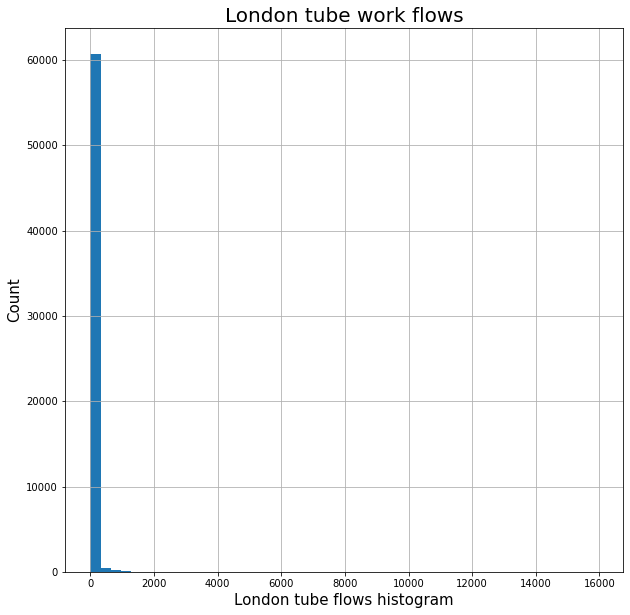

In [105]:
#plt.subplots(figsize=(10,10))

#plt.hist(cdata["flows"], histtype="stepfilled" , bins = 50)
#plt.xlabel("London tube flows histogram", fontsize = 15)
#plt.ylabel("Count", fontsize= 15)
#plt.title("London tube work flows", fontsize = 20)
#plt.grid(True)

Text(0.5, 0, 'Dist')

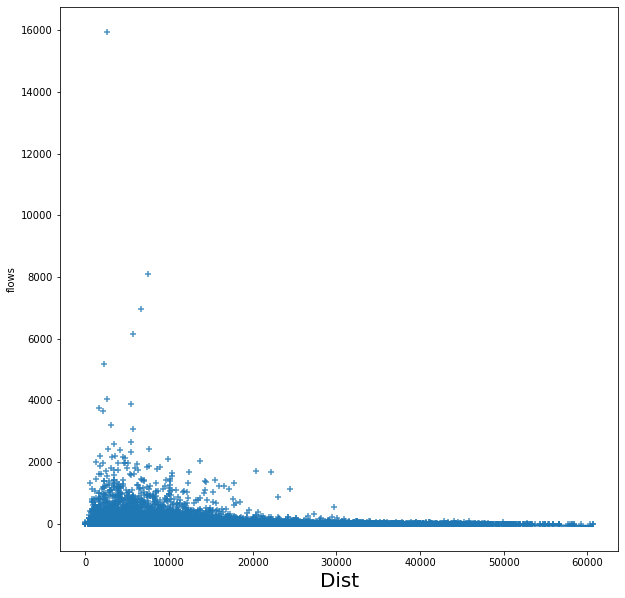

In [107]:
##before taking log
#x = cdata["distance"]
#y = cdata["flows"]

##create the subplot
#fig, ax = plt.subplots(figsize = (10,10))
##plot the results along with the line of best fit
#sns.regplot(x=x, y=y, marker="+", ax=ax)
#ax.set_xlabel("Dist", fontsize = 20)

Text(0, 0.5, 'log(Total flows)')

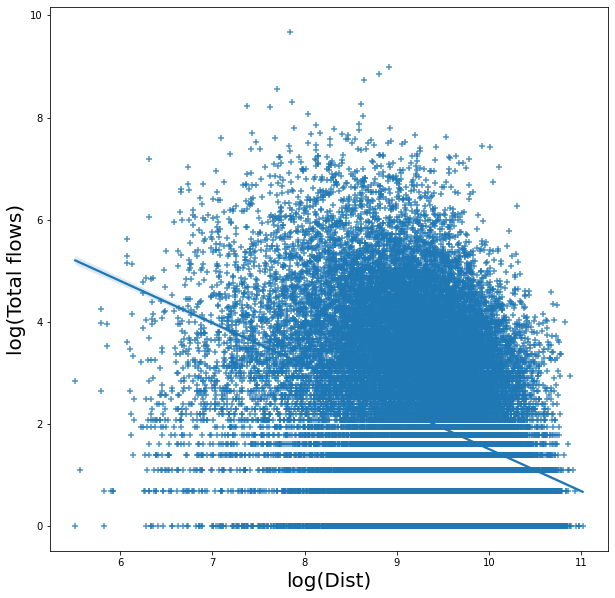

In [108]:
##quiet poissony, there for we decide to log the equation

##subset the dataframe to the flows we want
#cdata_flows = cdata[["flows", "distance"]]
##remove all 0 values (logarithms can't deal with 0 values)
#cdata_flows = cdata_flows[(cdata_flows!=0).all(1)]

##extract the x and y converting to log
#x = np.log(cdata_flows["distance"])
#y = np.log(cdata_flows["flows"])

##create the subplot
#fig, ax = plt.subplots(figsize = (10,10))
##plot the results along with the line of best fit
#sns.regplot(x=x, y=y, marker="+", ax=ax)
#ax.set_xlabel("log(Dist)", fontsize = 20)
#ax.set_ylabel("log(Total flows)", fontsize = 20)

In [110]:
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

##delete NA value before taking logarithms
#cdata = cdata[cdata['population']!=0]
#cdata = cdata[cdata['jobs']!=0]
#cdata = cdata[cdata['distance']!=0]


##take the variables and produce logarithms of them
#x_variables = ["population", "jobs", "distance"]
#log_x_vars = []
#for x in x_variables:
#    cdata[f"log_{x}"] = np.log(cdata[x])
#    log_x_vars.append(f"log_{x}")

In [111]:
#cdata.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274
